0. **[Stuff](#0.-Stuff)**<br>
    0.1 [Imports](#0.1-Imports)<br>
    0.2 [Definitions](#0.2-Definitions)<br>
    0.3 [Functions](#0.3-Functions)<br>
1. **[Loop through waveforms](#1.-Loop-through-waveforms)**<br>
2. **[Plots](#2.-Plots)**<br>
    2.1 [S1 along the TPC](#2.1-S1-along-the-TPC)<br>
    2.2 [Ly along the TPC](#2.2-Ly-along-the-TPC)<br>

# 0. Stuff

## 0.1 Imports

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colors
from matplotlib.colors import LogNorm

%matplotlib inline
from scipy.optimize import curve_fit, minimize
import straxbra
from matplotlib.ticker import AutoMinorLocator
from matplotlib.image import NonUniformImage
import pandas as pd
import patrick_stylez as ps
import math
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import chi2 
import functions as fc

Using TensorFlow backend.


## 0.2 Definitions


In [2]:
ctx = straxbra.XebraContext()
run = '00250'
peaks_data = ctx.get_array(run, 'peaks')
position_data = ctx.get_array(run, 'peak_positions')
waveform = peaks_data['data']
integral = peaks_data['area']
width = peaks_data['width'][:,5]
timestamp = peaks_data['time']
risetime = -peaks_data['area_decile_from_midpoint'][:,1]
area_per_channel = peaks_data['area_per_channel']
x_position = position_data['x']
y_position = position_data['y']

## 0.3 Functions

In [3]:


# def CutCondition(waveform):  
#     FirstPeak_area = sum(waveform[:15])
#     SecondPeak_area = sum(waveform[15:])    
#     if  FirstPeak_area > 100 and FirstPeak_area < 500 and SecondPeak_area > 40 and SecondPeak_area  < 200: 
#         return(True)
#     else:
#         return(False)



# def CutCondition(waveform):  
#     FirstPeak_area = sum(waveform[:15])
#     SecondPeak_area = sum(waveform[15:])
#     FirstPeak_maximum = max(waveform[:15])
#     SecondPeak_maximum = max(waveform[15:])
#     SecondPeak_index = np.where(waveform == SecondPeak_maximum)
#     SecondPeak_index_left = SecondPeak_index[0][0] -1
#     SecondPeak_index_right = SecondPeak_index[0][0] +1
#     SecondPeak_maximum_left = waveform[SecondPeak_index_left]
#     SecondPeak_maximum_right = waveform[SecondPeak_index_right]

    
    
    
#     if  FirstPeak_area > 100 and FirstPeak_area < 500 and SecondPeak_area > 40 and SecondPeak_area  < 200 \
#     and SecondPeak_maximum < 0.5 * FirstPeak_maximum \
#     and SecondPeak_maximum > 0.25 * FirstPeak_maximum \
#     and SecondPeak_maximum > waveform[SecondPeak_index_left] \
#     and SecondPeak_maximum > waveform[SecondPeak_index_right] \
#     : 
#         return(True)
#     else:
#         return(False)

# def drifttime_to_z(t):
#     return a * t + b

# def S2_found(integral, width):
#     if integral > 500 and width >200 and width < 2000:
#         return True
#     else:
#         return False

  
    
# def poisson_interval(k, alpha=0.318):
#     a = alpha
#     low, high = (chi2.ppf(a/2, 2*k) / 2, chi2.ppf(1-a/2, 2*k + 2) / 2)
#     if k == 0:
#         low = 0.0
#     low_interval = k - low
#     high_interval = high - k
#     return low_interval, high_interval
    
def Process(waveform, i,aii, bii): 
    SelectionCutFlag = fc.CutCondition(waveform[i])
    if SelectionCutFlag == True:
        j = 1
        counter_timestamp = timestamp[i+j]
        threshold_timestamp = timestamp[i] + 45000
        while threshold_timestamp >= counter_timestamp and  fc.S2_found(integral = integral[i+j], width = width[i+j]) == False:  
            j += 1
            counter_timestamp = timestamp[i+j]
        else:
            if fc.S2_found(integral = integral[i+j], width = width[i+j]):

                k=1 
                s2_counter_timestamp = timestamp[i+j+k]
                z_position = fc.drifttime_to_z(timestamp[i+j] - timestamp[i], ai=aii, bi=bii)
                while threshold_timestamp >= s2_counter_timestamp and fc.S2_found(integral = integral[i+j+k], width = width[i+j+k]) == False:
                    k += 1
                    s2_counter_timestamp = timestamp[i+j+k]
                else:

                    if threshold_timestamp <= s2_counter_timestamp:
#                     if threshold_timestamp <= s2_counter_timestamp and z_position >= -70 and z_position <= -5:
                        time       = timestamp[i+j] - timestamp[i]
                        drifttime.append(time)
                        s2.append(integral[i+j])
                        s1.append(integral[i])
                        s1_corrected.append(integral[i]/(-0.0069 *z_position + 0.76))
                        x.append(x_position[i+j])
                        y.append(y_position[i+j])
                        z.append(z_position)
                        r_position = np.sqrt(x_position[i+j]**2 + y_position[i+j]**2)
                        r.append(r_position)
                        
                        for k in range(len(PMT_area_list)):
                            if area_per_channel[i+j][1] > 0 and area_per_channel[i+j][2] > 0 \
                            and area_per_channel[i+j][3] > 0 and area_per_channel[i+j][4] > 0 \
                            and area_per_channel[i+j][5] > 0 and area_per_channel[i+j][6] > 0 \
                            and area_per_channel[i+j][7] > 0 \
                            :
                                PMT_area_list[k].append(area_per_channel[i+j][k+1])
                                sum_area = sum(area_per_channel[i+j][1:8])   
                                sample_list = []
                                for m in range(len(area_per_channel[i+j][1:8])):
                                    sample_list.append(float(area_per_channel[i+j][1:8][m]))
                                sum_area = sum(sample_list)

                                for n in range(len(PMT_area_list)):
                                    if sum_area > area_per_channel[i+j][n+1]:
                                        PMT_area_fraction_list[n].append((area_per_channel[i+j][n+1])/sum_area)

#                         if area_per_channel[i+j][1] > 0 and area_per_channel[i+j][2] > 0 \
#                             and area_per_channel[i+j][3] > 0 and area_per_channel[i+j][4] > 0 \
#                             and area_per_channel[i+j][5] > 0 and area_per_channel[i+j][6] > 0 \
#                             and area_per_channel[i+j][7] > 0 and r_position <= fiducial_r \
#                             :
                            
#                             s2_cut.append(integral[i+j])
#                             s1_cut.append(integral[i])
#                             s1_cut_corrected.append(integral[i]/(-0.0069 *z_position + 0.76))
#                             r_cut.append(r_position)
#                             x_cut.append(x_position[i+j])
#                             y_cut.append(y_position[i+j])
#                             z_cut.append(z_position)
                            
                        if area_per_channel[i+j][1] > 0 and area_per_channel[i+j][2] > 0 \
                            and area_per_channel[i+j][3] > 0 and area_per_channel[i+j][4] > 0 \
                            and area_per_channel[i+j][5] > 0 and area_per_channel[i+j][6] > 0 \
                            and area_per_channel[i+j][7] > 0\
                            :
                            
                            s2_cut.append(integral[i+j])
                            s1_cut.append(integral[i])
                            s1_cut_corrected.append(integral[i]/(-0.0069 *z_position + 0.76))
                            r_cut.append(r_position)
                            x_cut.append(x_position[i+j])
                            y_cut.append(y_position[i+j])
                            z_cut.append(z_position)



# 1. Loop through waveforms

In [4]:

left_edge  = [0, 0]
right_edge = [40500.0, -71.5]
a = ((right_edge[1])-(left_edge[1])) / ((right_edge[0])-(left_edge[0]))
b = (right_edge[1]) - a * (right_edge[0])
fiducial_r = 23

s1 = []
s2 = []
drifttime = []
r = []
x = []
y = []
z = []
Area_s2_PMT1 = []
Area_s2_PMT2 = []
Area_s2_PMT3 = []
Area_s2_PMT4 = []
Area_s2_PMT5 = []
Area_s2_PMT6 = []
Area_s2_PMT7 = []

Area_fraction_s2_PMT1 = []
Area_fraction_s2_PMT2 = []
Area_fraction_s2_PMT3 = []
Area_fraction_s2_PMT4 = []
Area_fraction_s2_PMT5 = []
Area_fraction_s2_PMT6 = []
Area_fraction_s2_PMT7 = []
PMT_area_list = [Area_s2_PMT1, Area_s2_PMT2,Area_s2_PMT3,Area_s2_PMT4,Area_s2_PMT5,Area_s2_PMT6,Area_s2_PMT7]
PMT_area_fraction_list = [Area_fraction_s2_PMT1, Area_fraction_s2_PMT2,Area_fraction_s2_PMT3,Area_fraction_s2_PMT4,Area_fraction_s2_PMT5,Area_fraction_s2_PMT6,Area_fraction_s2_PMT7]


s1_corrected = []
s1_cut_corrected= []
s1_cut = []
s2_cut = []
r_cut = []
x_cut = []
y_cut = []
z_cut = []                                                
num = len(waveform)
print_counter = 0.0
for i in range(0,num-10):    
    Process(waveform,i,aii=a, bii=b)
    if i/num >= print_counter:
        print(round(print_counter,2), end = ' ')
        print_counter += 0.1
print(1.0, '        Run ',run, 'done!')

0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0         Run  00250 done!


[5652.022903442383, 4784.0692138671875, 6644.3454513549805, 5936.482315063477, 5427.567108154297, 3212.3075942993164, 7935.374340057373, 13341.864883422852, 3936.7255506515503, 4471.254223823547, 6753.590606689453, 4649.653778076172, 5831.337043762207, 4375.387073516846, 8500.607208251953, 5416.339767456055, 4469.632981777191, 5032.77473449707, 5082.200908660889, 5125.001022338867]


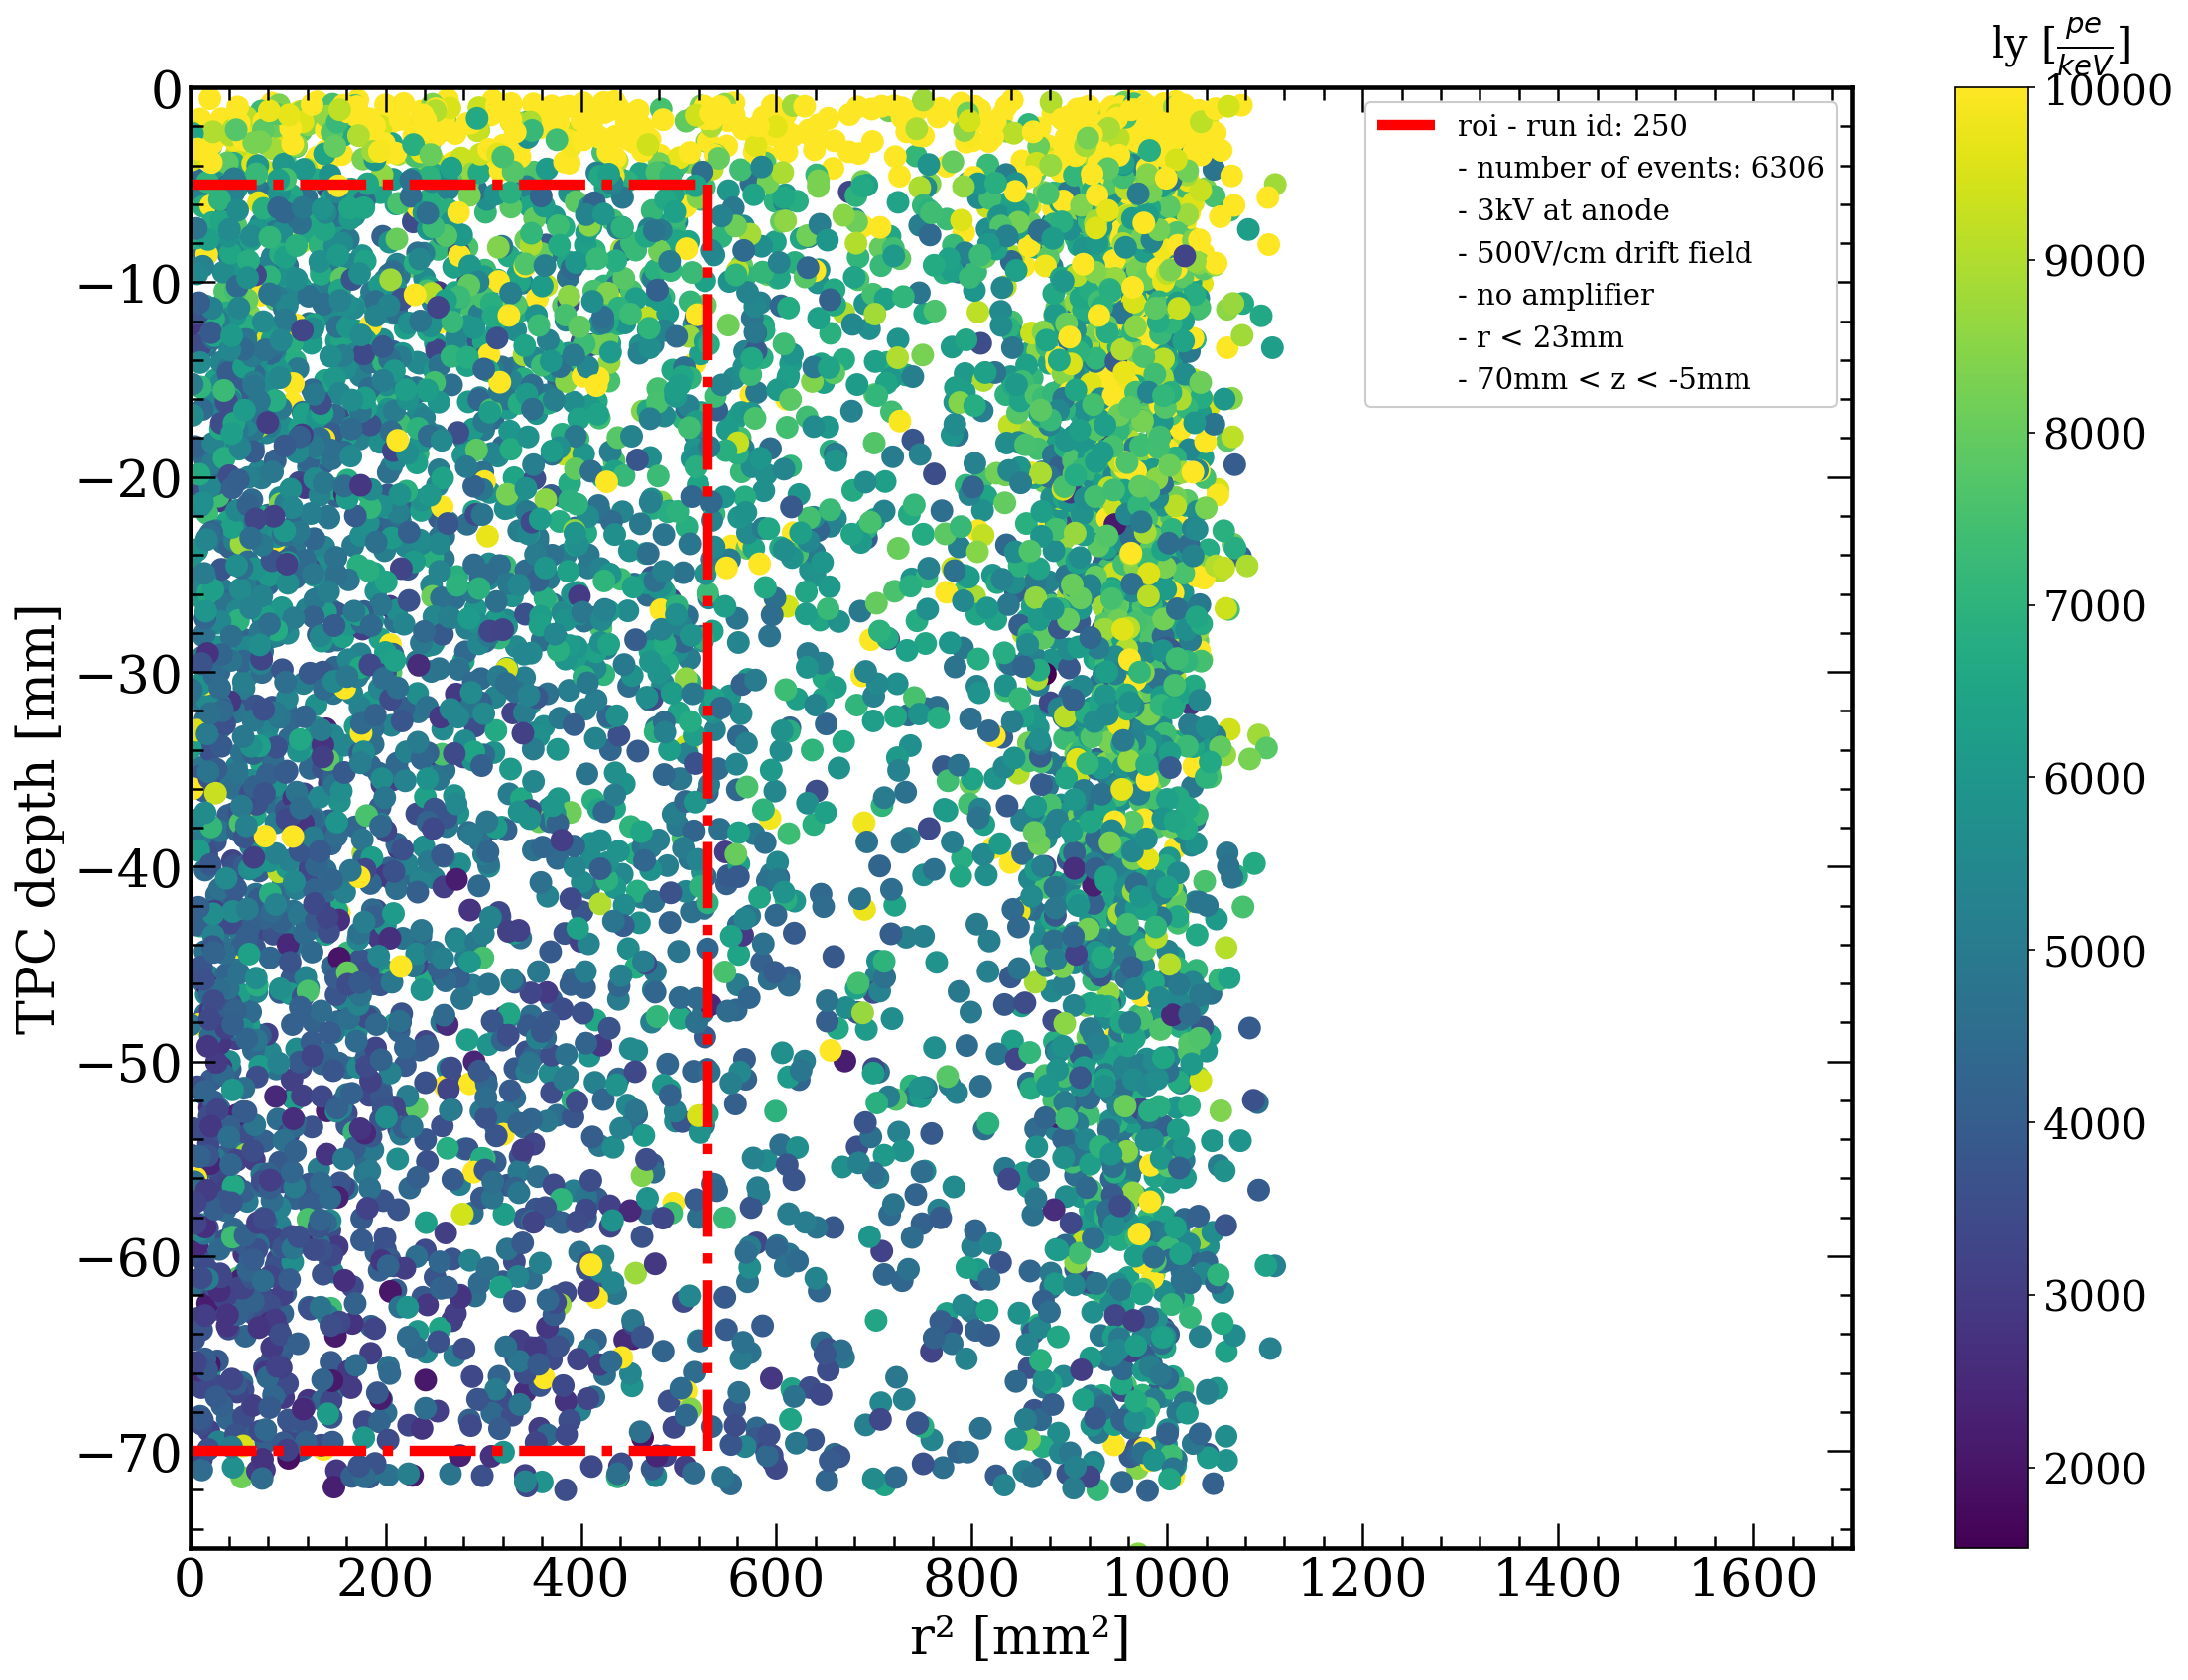

In [15]:
s2_top = [sum(i) for i in zip(*PMT_area_list)]
    
print(s2_top[:20])

s2_top= np.array(s2_top)
z = np.array(z)
z_absolute = abs(z)
r_2 = np.array(r)**2

r_fiducial = 23

s1_cut = np.array(s1_cut)
z_cut = np.array(z_cut)
r_2_cut = np.array(r_cut)**2
fig, axes = ps.styles()

sc = axes.scatter(r_2_cut, z_cut, c =s2_top, s=100, vmax=10_000)

axes.vlines(x = r_fiducial**2, ymin = -5, ymax =-70, linestyle = '-.', linewidth = 5, color = 'r', label ='roi - run id: '+ str(run[2:])) 
axes.hlines(y = -70, xmin = 0, xmax =r_fiducial**2, linestyle = '-.', linewidth = 5, color = 'r')
axes.hlines(y = -5, xmin = 0, xmax =r_fiducial**2, linestyle = '-.', linewidth = 5, color = 'r')

axes.plot([], [], ' ', label="- 70mm < z < -5mm")
axes.plot([], [], ' ', label="- r < 23mm")
axes.plot([], [], ' ', label="- no amplifier")
axes.plot([], [], ' ', label="- 500V/cm drift field")
axes.plot([], [], ' ', label="- 3kV at anode")
axes.plot([], [], ' ', label="- number of events: "+str(len(r_2_cut)))

cb = plt.colorbar(sc)
cb.set_label('ly [$\\frac{pe}{keV}$]',labelpad=-55, y=1.05, rotation = 0, size = 20)
cb.ax.tick_params(labelsize=20)
# cb.ax.set_title('s1 [pe]')
axes.set_xlim([0,1700])
axes.set_ylim([0,75])
axes.set_xlabel('r² [mm²]')
axes.set_ylabel('TPC depth [mm]')
handles,labels = axes.get_legend_handles_labels()
handles = [handles[6],handles[5],handles[4],handles[3],handles[2],handles[1],handles[0]]
labels = [labels[6],labels[5],labels[4],labels[3],labels[2],labels[1],labels[0]]

axes.set_ylim([-75,0])
axes.legend(handles,labels, loc = 1,prop={'size': 14}, fancybox=True, framealpha=1)

plt.show()

# 2. Plots

# 2.1 S1 along the TPC

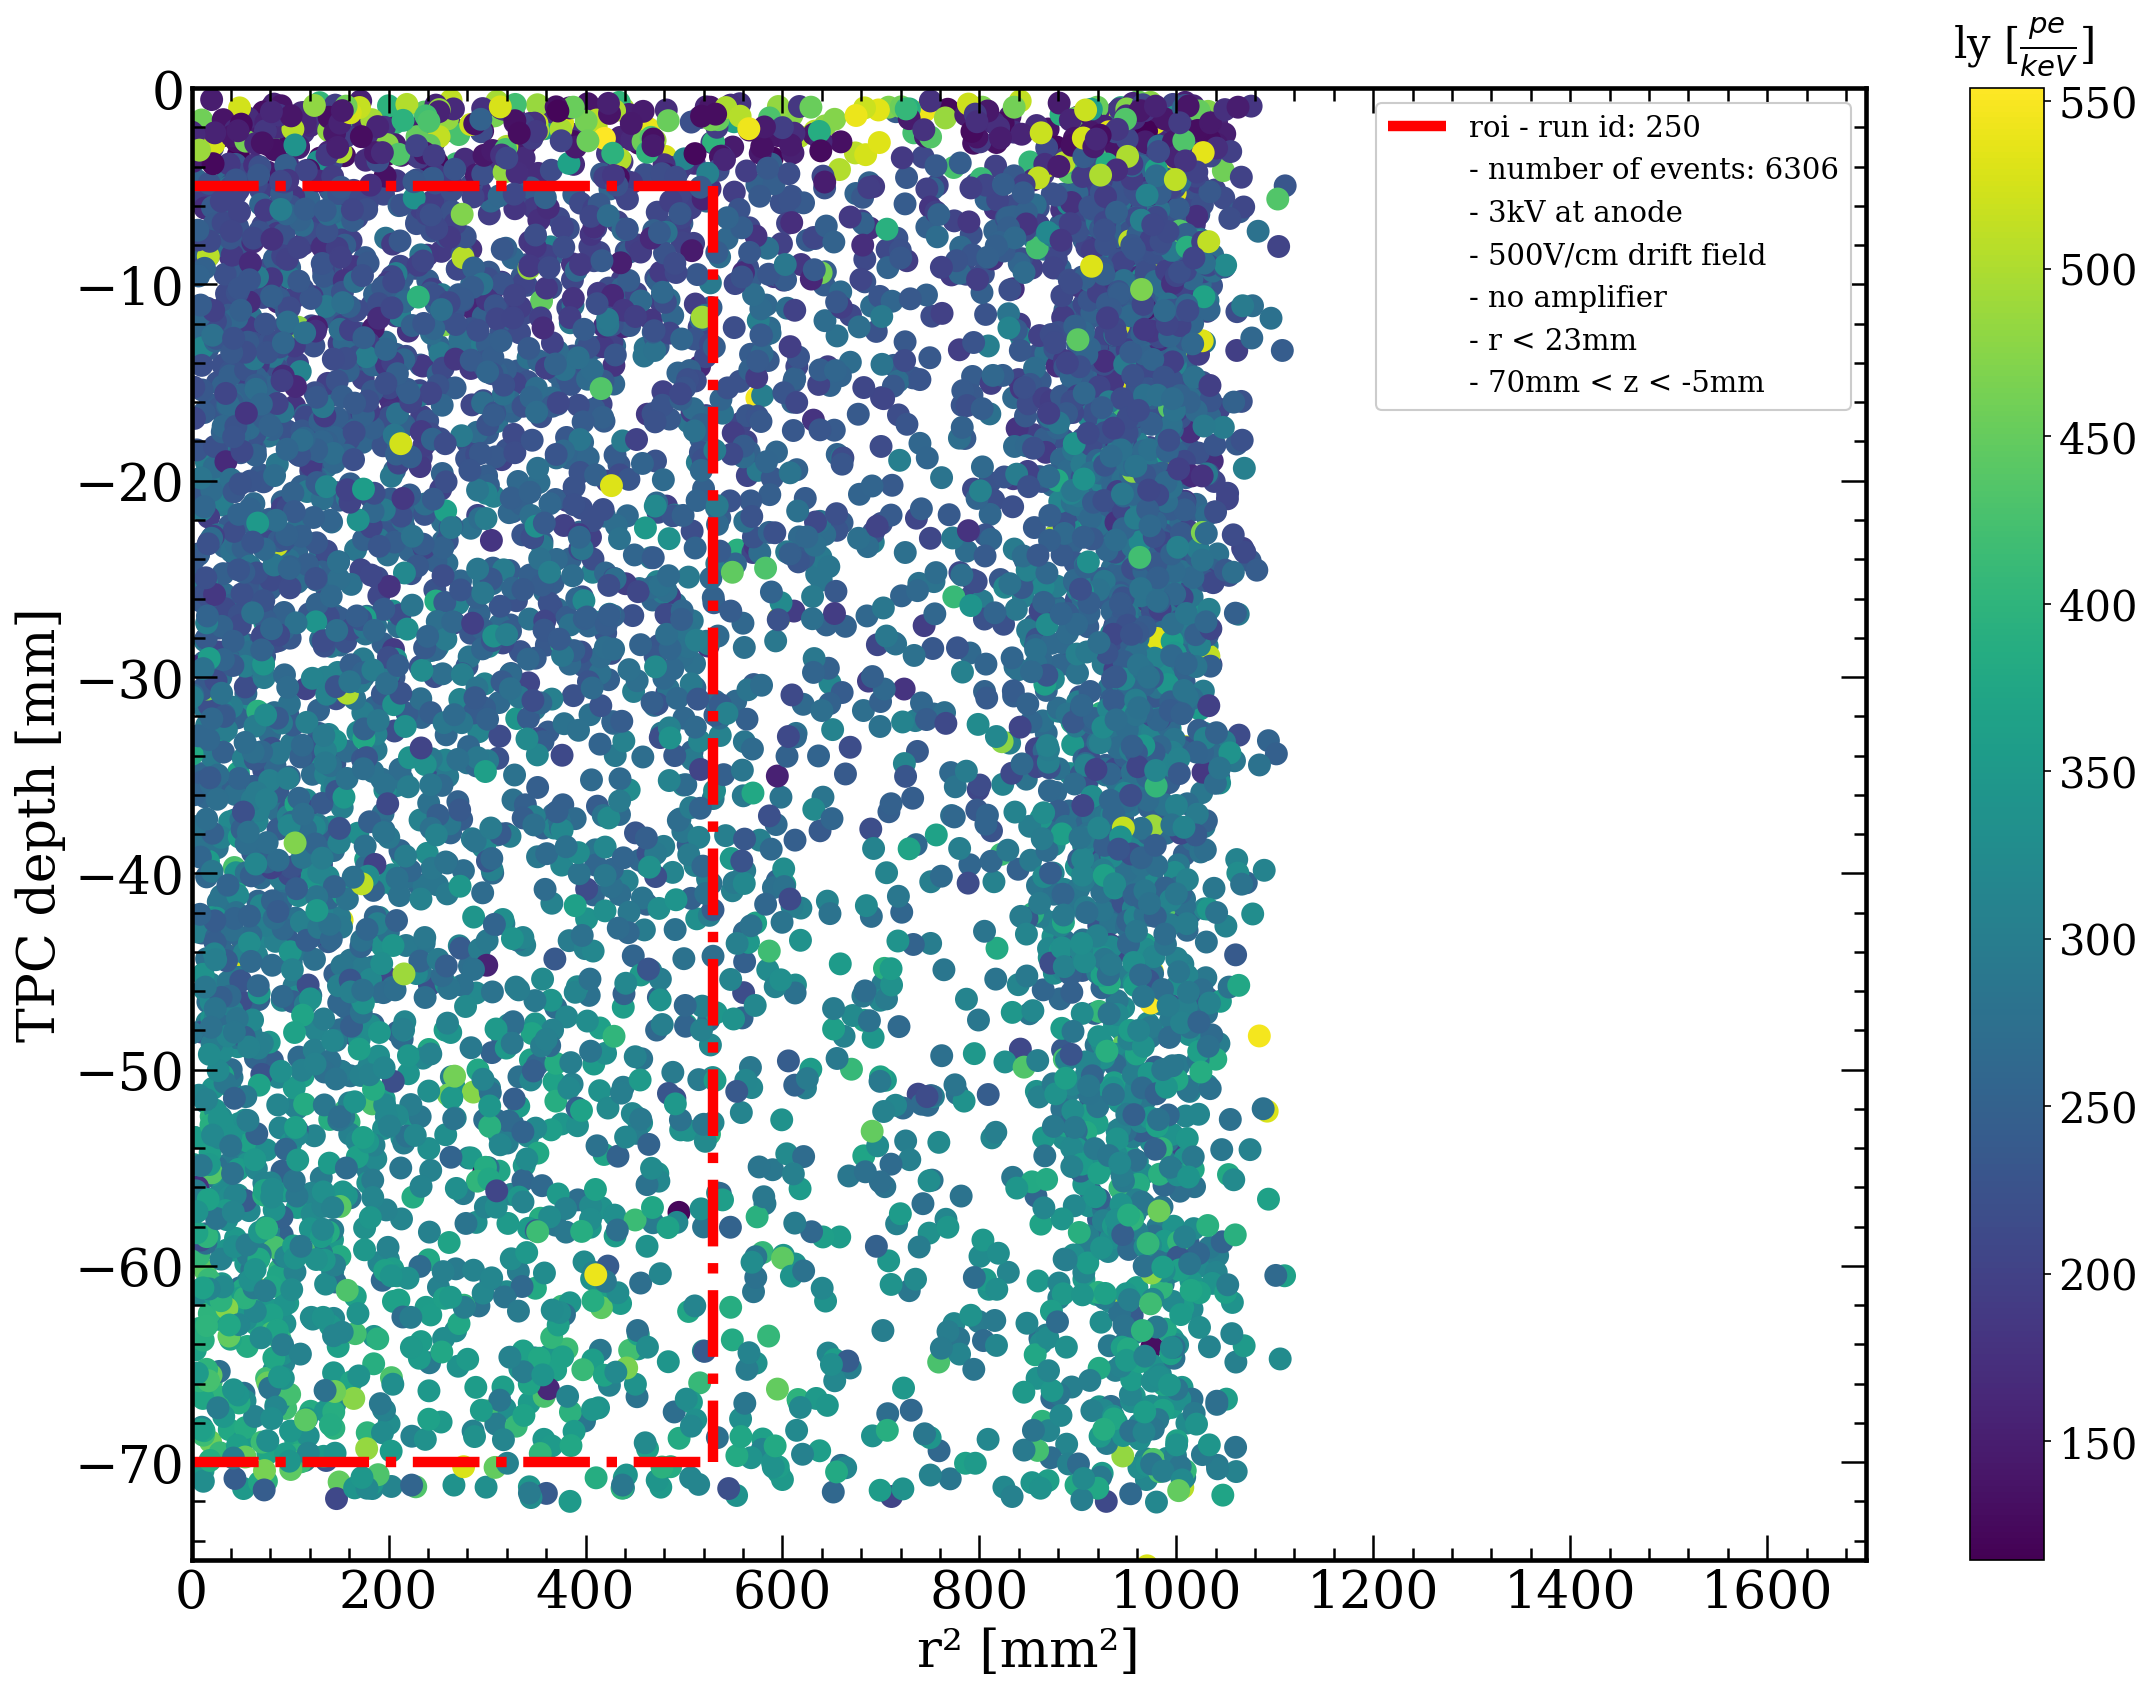

In [16]:
s1= np.array(s1)
z = np.array(z)
z_absolute = abs(z)
r_2 = np.array(r)**2

r_fiducial = 23

s1_cut = np.array(s1_cut)
z_cut = np.array(z_cut)
r_2_cut = np.array(r_cut)**2
fig, axes = ps.styles()

sc = axes.scatter(r_2_cut, z_cut, c =s1_cut, s=100)

axes.vlines(x = r_fiducial**2, ymin = -5, ymax =-70, linestyle = '-.', linewidth = 5, color = 'r', label ='roi - run id: '+ str(run[2:])) 
axes.hlines(y = -70, xmin = 0, xmax =r_fiducial**2, linestyle = '-.', linewidth = 5, color = 'r')
axes.hlines(y = -5, xmin = 0, xmax =r_fiducial**2, linestyle = '-.', linewidth = 5, color = 'r')

axes.plot([], [], ' ', label="- 70mm < z < -5mm")
axes.plot([], [], ' ', label="- r < 23mm")
axes.plot([], [], ' ', label="- no amplifier")
axes.plot([], [], ' ', label="- 500V/cm drift field")
axes.plot([], [], ' ', label="- 3kV at anode")
axes.plot([], [], ' ', label="- number of events: "+str(len(r_2_cut)))

cb = plt.colorbar(sc)
cb.set_label('ly [$\\frac{pe}{keV}$]',labelpad=-55, y=1.05, rotation = 0, size = 20)
cb.ax.tick_params(labelsize=20)
# cb.ax.set_title('s1 [pe]')
axes.set_xlim([0,1700])
axes.set_ylim([0,75])
axes.set_xlabel('r² [mm²]')
axes.set_ylabel('TPC depth [mm]')
handles,labels = axes.get_legend_handles_labels()
handles = [handles[6],handles[5],handles[4],handles[3],handles[2],handles[1],handles[0]]
labels = [labels[6],labels[5],labels[4],labels[3],labels[2],labels[1],labels[0]]

axes.set_ylim([-75,0])
axes.legend(handles,labels, loc = 1,prop={'size': 14}, fancybox=True, framealpha=1)

plt.show()

# 2.2 Ly along the TPC

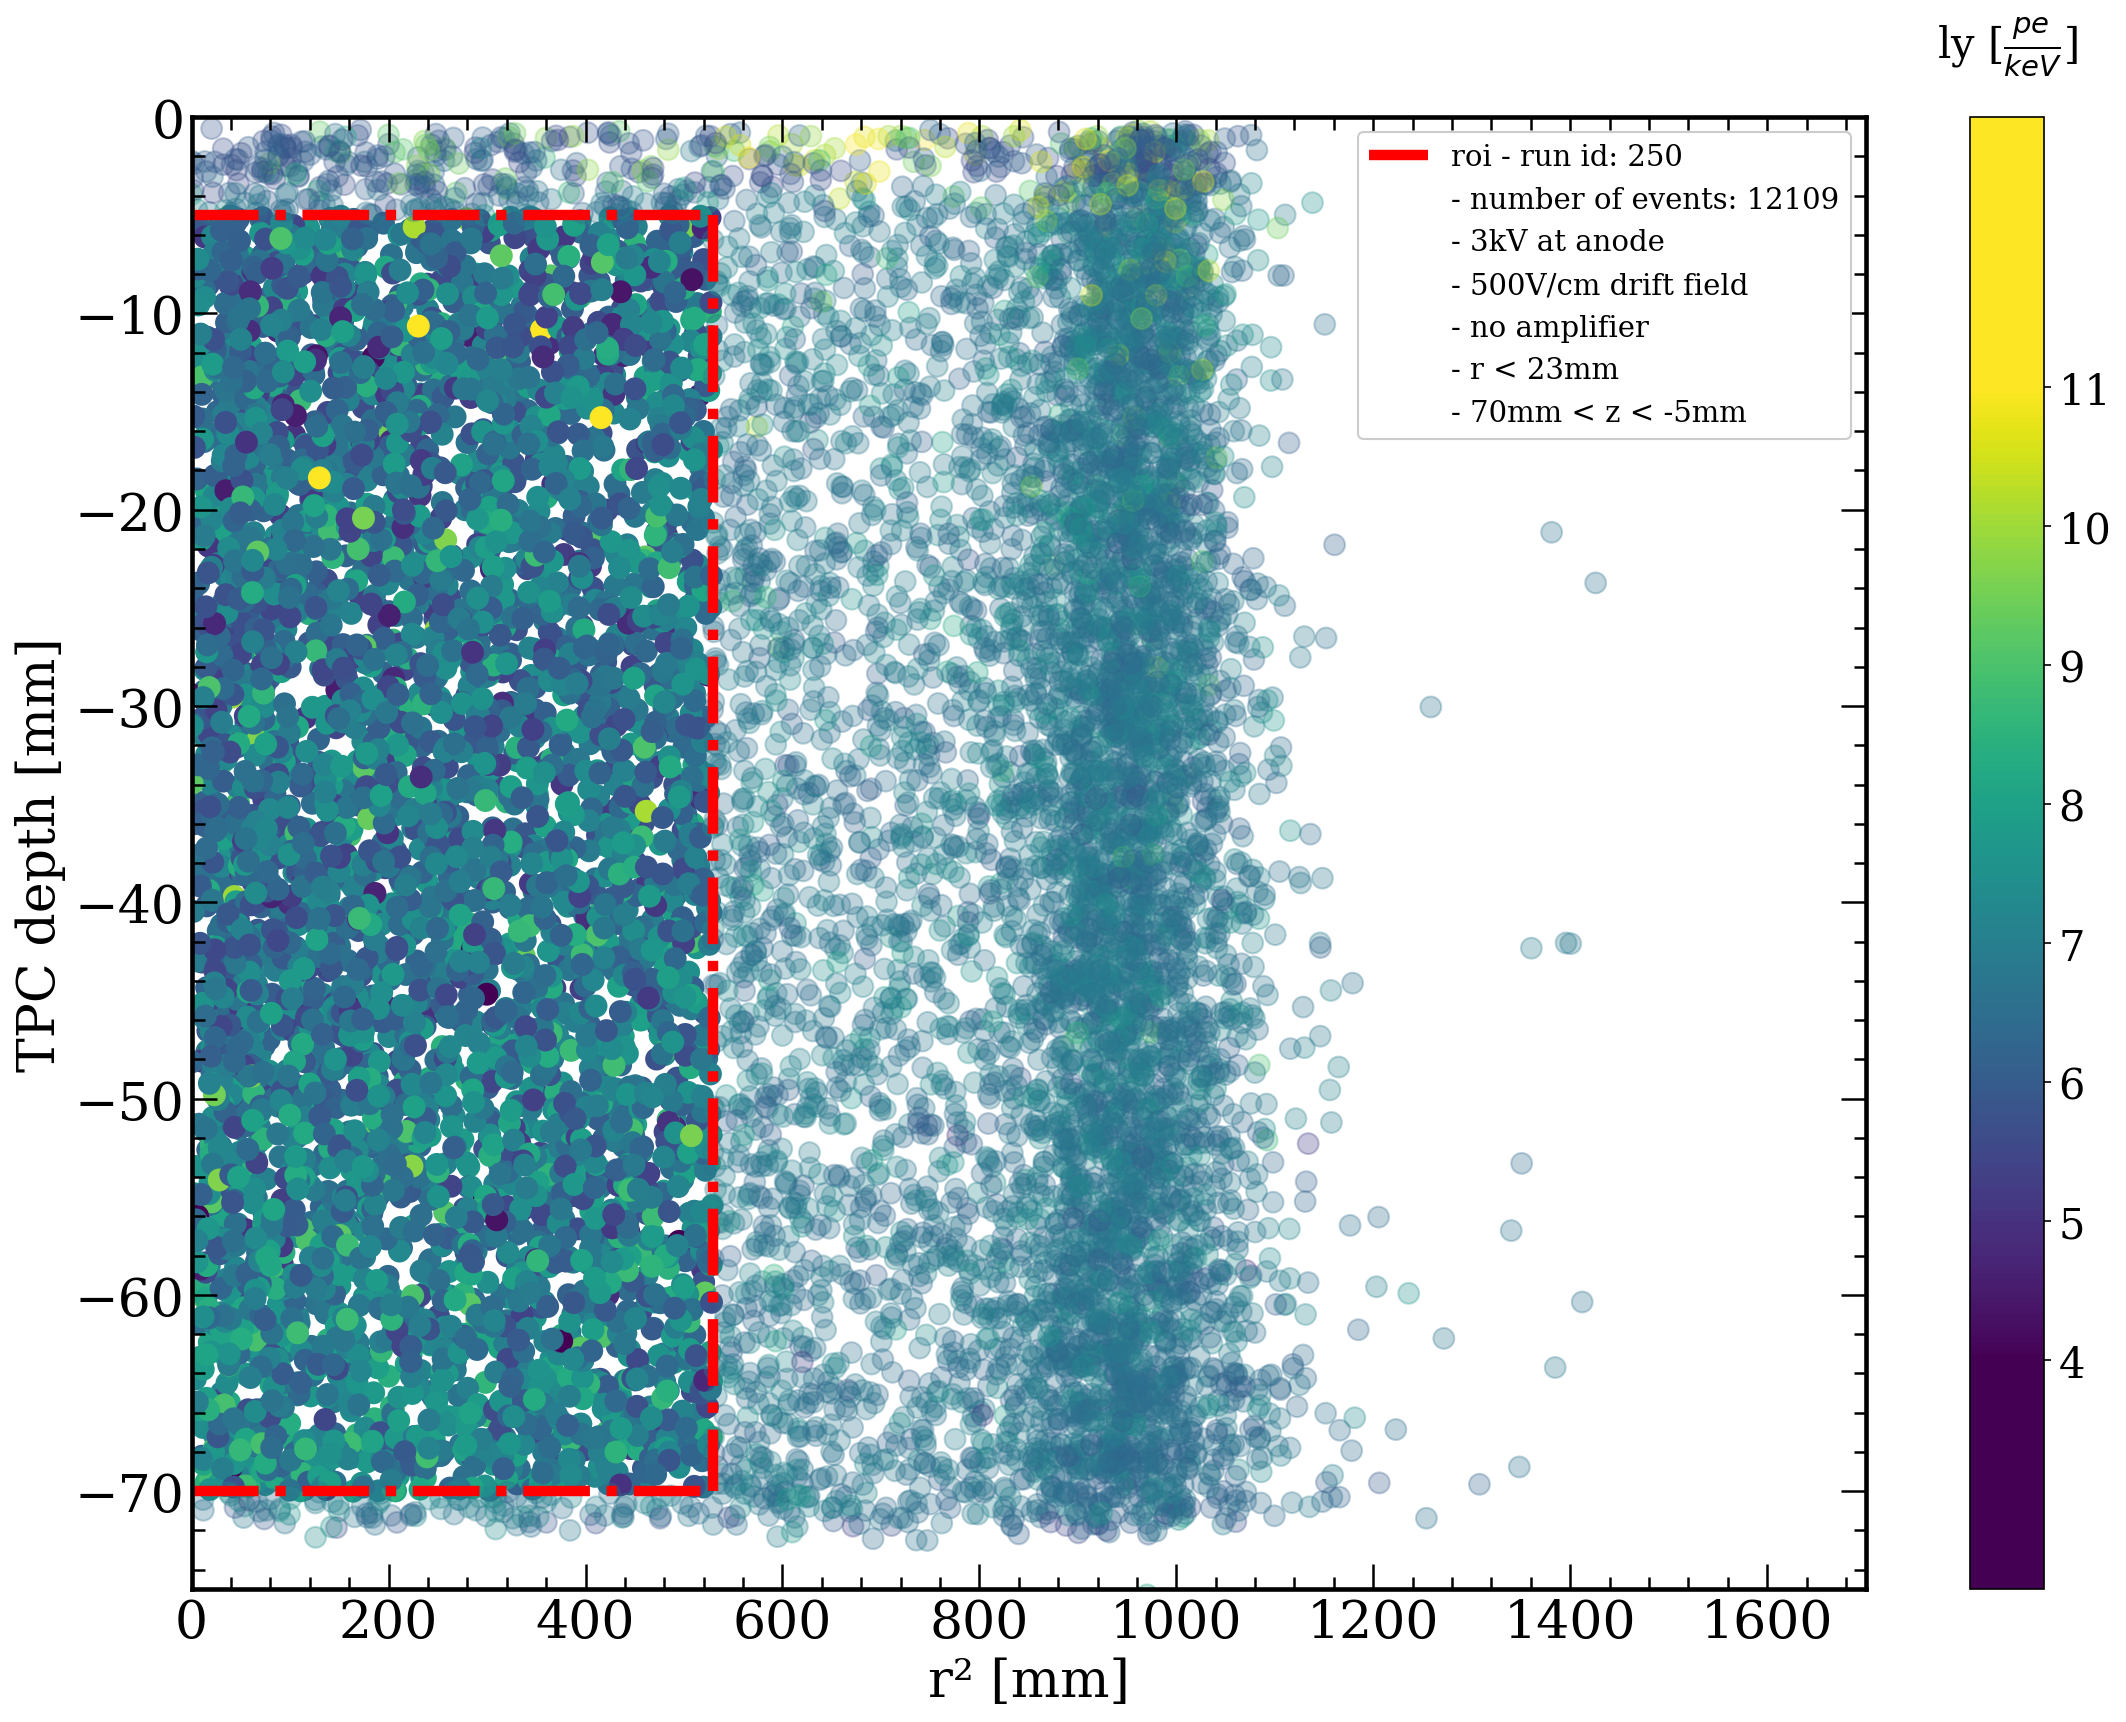

In [6]:
# for i in range(len(z)):
#     if z[i] < -70:
#         print(z[i])


r_fiducial = 23

r_2_outside = []
r_2_inside = []
z_outside = []
z_inside = []
s1_outside = []
s1_inside = []
s1_outside_corrected = []
s1_inside_corrected = []

for i in range(len(r_2)):
    if r_2[i] > r_fiducial**2 or (z[i] < -70 or z[i] > -5) and np.array(s1[i])/41.5 < 11:
        r_2_outside.append(r_2[i])
        z_outside.append(z[i])
        s1_outside.append(s1[i])
        s1_outside_corrected.append(s1_corrected[i])
        
for i in range(len(r_2)):        
    if r_2[i] < r_fiducial**2 and z[i] > -70 and z[i] < -5 and np.array(s1[i])/41.5 < 11:
        r_2_inside.append(r_2[i])
        z_inside.append(z[i])
        s1_inside.append(s1[i])
        s1_inside_corrected.append(s1_corrected[i])

s1_array_outside = np.array(s1_outside)
s1_array_inside = np.array(s1_inside)

s1_array_outside_corrected = np.array(s1_outside_corrected)
s1_array_inside_corrected = np.array(s1_inside_corrected)

fig, axes = ps.styles()



# sc = axes.scatter(r_2, z, c =s1/41.5, s=100)
sc = axes.scatter(r_2_inside, z_inside, c =s1_array_inside_corrected/41.5, s=100)
axes.scatter(r_2_outside, z_outside, c =s1_array_outside_corrected/41.5, s=100, alpha = 0.3)
axes.vlines(x = r_fiducial**2, ymin = -5, ymax =-70, linestyle = '-.', linewidth = 5, color = 'r', label ='roi - run id: '+ str(run[2:]))
axes.hlines(y = -70, xmin = 0, xmax =r_fiducial**2, linestyle = '-.', linewidth = 5, color = 'r')
axes.hlines(y = -5, xmin = 0, xmax =r_fiducial**2, linestyle = '-.', linewidth = 5, color = 'r')

axes.plot([], [], ' ', label="- 70mm < z < -5mm")
axes.plot([], [], ' ', label="- r < 23mm")
axes.plot([], [], ' ', label="- no amplifier")
axes.plot([], [], ' ', label="- 500V/cm drift field")
axes.plot([], [], ' ', label="- 3kV at anode")
axes.plot([], [], ' ', label="- number of events: "+str(len(r_2)))


cb = plt.colorbar(sc)
cb.set_label('ly [$\\frac{pe}{keV}$]',labelpad=-50, y=1.07, rotation = 0, size = 20)
cb.ax.tick_params(labelsize=20)
cb.set_clim(vmin=4, vmax=11)



axes.set_xlim([0,1700])
axes.set_ylim([0,75])
axes.set_xlabel('r² [mm]')
axes.set_ylabel('TPC depth [mm]')
handles,labels = axes.get_legend_handles_labels()
handles = [handles[6],handles[5],handles[4],handles[3],handles[2],handles[1],handles[0]]
labels = [labels[6],labels[5],labels[4],labels[3],labels[2],labels[1],labels[0]]
axes.set_ylim([-75,0])

axes.legend(handles,labels, loc = 1,prop={'size': 14},fancybox=True, framealpha=1)

plt.show()

# 3. Compare Position reconstruction

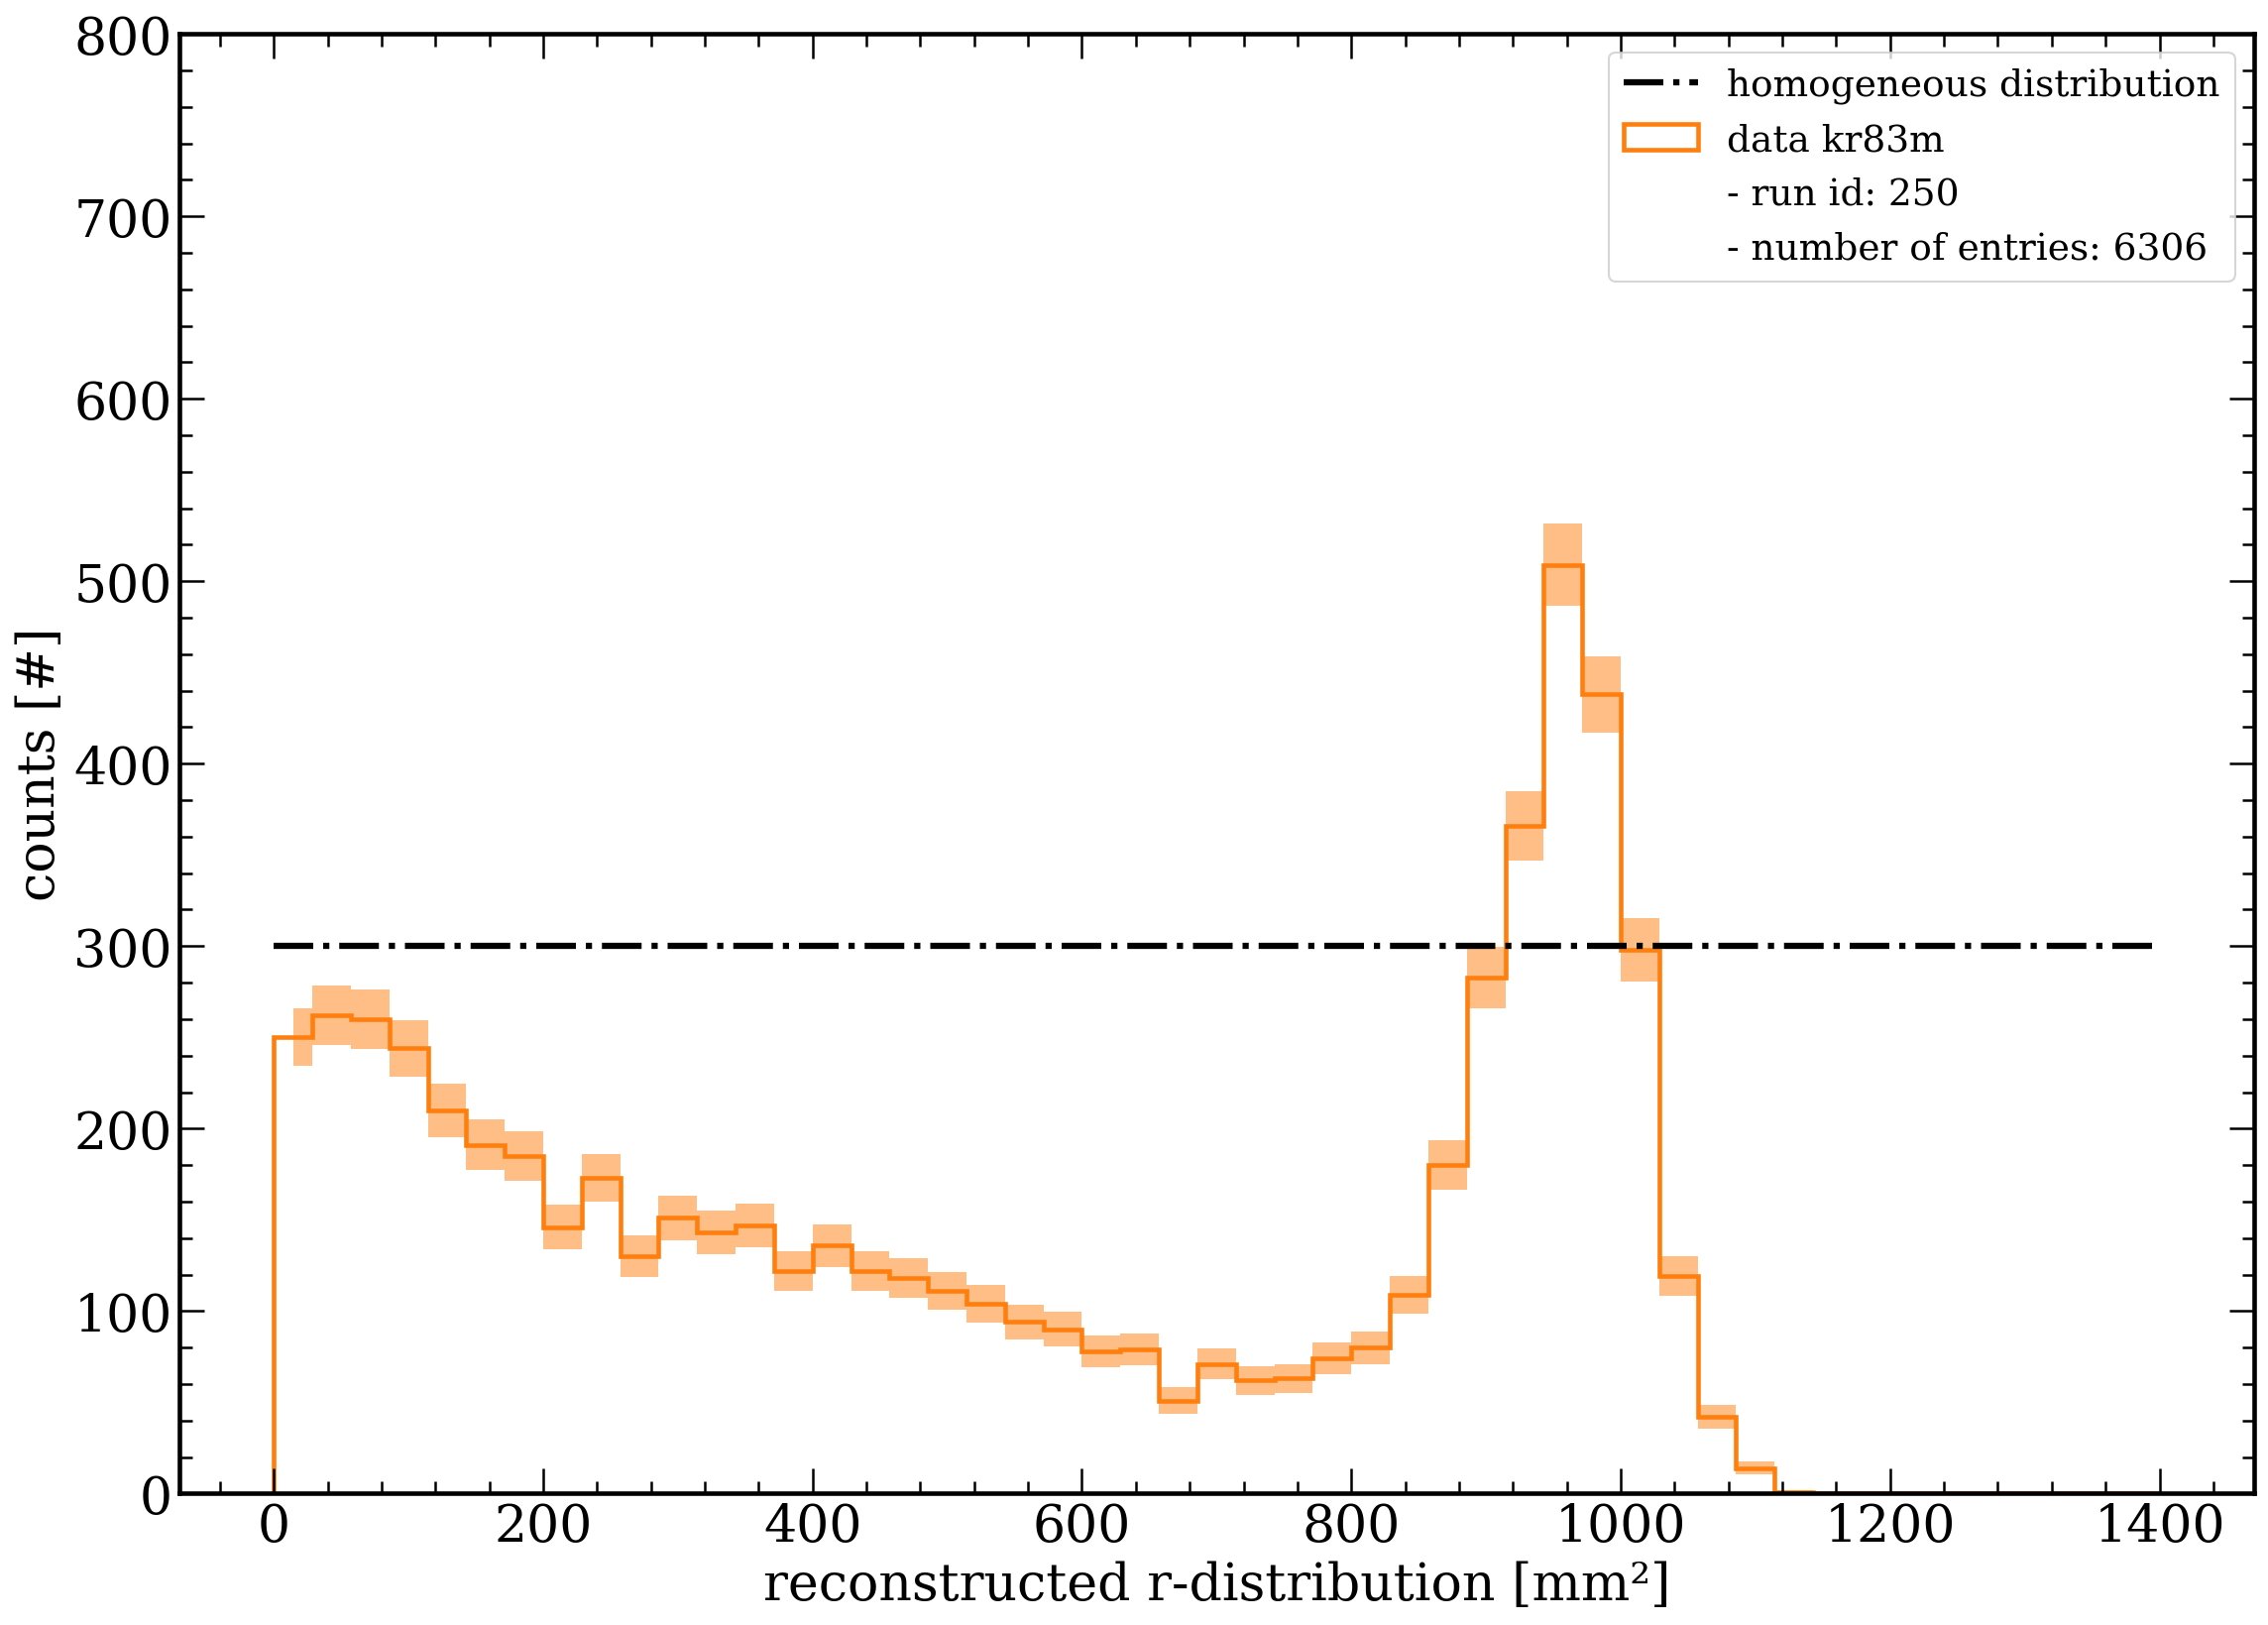

In [7]:
fig, axes = ps.styles()

bins_x = np.linspace(0,1400,50)
bins_x_center = (bins_x[1:] + bins_x[:-1])/2
bin_fullwidths = (bins_x[1:] - bins_x[:-1])







counts,_, patches = plt.hist(r_2_cut, bins=bins_x, density = False, 
                            histtype='step', linewidth = 2.2, color = 'C1',
                            label = 'data kr83m')


plt.fill_between(bins_x_center, counts - np.sqrt(counts), counts + np.sqrt(counts), 
                 facecolor='C1', alpha=0.5, step = 'mid')

axes.hlines(y = 300,xmin = 0, xmax = 1400, linestyle = '-.', linewidth = 3, color = 'black', label = 'homogeneous distribution')
axes.plot([], [], ' ', label="- number of entries: "+str(len(r_2_cut)))
axes.plot([], [], ' ', label='- run id: '+ str(run[2:]))

axes.set_xlabel('reconstructed r-distribution [mm²]')
axes.set_ylabel('counts [#]')

handles,labels = axes.get_legend_handles_labels()
handles = [handles[3],handles[2],handles[1], handles[0]]
labels = [labels[3],labels[2],labels[1], labels[0]]


axes.legend(handles,labels, loc = 1,prop={'size': 18})

plt.ylim(0,800)

plt.show()


In [8]:
# print(counts)
# print(1400/50)
# print(529/28)

In [9]:
def Average(lst): 
    return sum(lst) / len(lst)

average = Average(counts[:18])
print(average)

172.27777777777777
